In [1]:
print("Interdisciplinary Group Project - Team 3")

Interdisciplinary Group Project - Team 3


In [91]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [92]:
# Reading the files.
# Changing the data types with the valid form.

# Montly per capital
# 2019-index = 100
monthly_gdp_uk = pd.read_excel("UK_Monthly_GDP.xlsx")
monthly_gdp_uk['Date'] =  pd.to_datetime(monthly_gdp_uk['Date'])

# Annual inflation ratio
annual_inflation_rate_yearly = pd.read_csv("annual_inflation_ratio.csv")
annual_inflation_rate_monthly = pd.read_csv("annual_inflation_ratio2.csv")

annual_inflation_rate_yearly['year'] =  pd.to_datetime(annual_inflation_rate_yearly['year'], format='%Y-%m-%d')
annual_inflation_rate_monthly['year'] =  pd.to_datetime(annual_inflation_rate_monthly['year'], format='%Y-%m-%d')


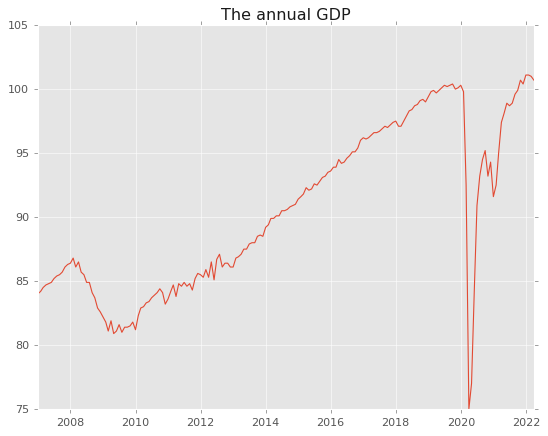

In [93]:
plt.figure()
plt.title('The annual GDP')
plt.plot(monthly_gdp_uk["Date"], monthly_gdp_uk["Monthly GDP"])

plt.show()
# Plot-1, the annual gross domestic product.

In [94]:
a = monthly_gdp_uk["Monthly GDP"][156:]
a.shape[0]

28

In [95]:
b = annual_inflation_rate_monthly["rate"][:28]
b.shape[0]

28

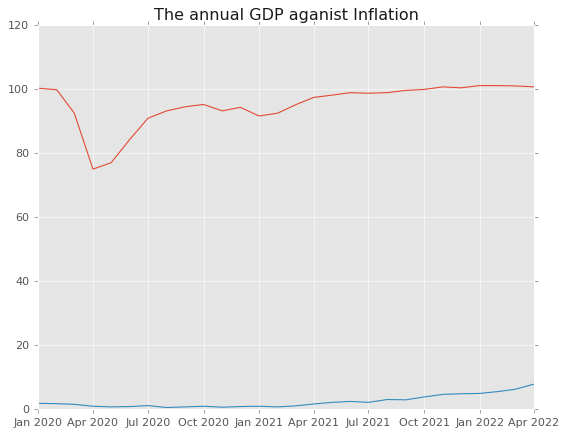

In [96]:
plt.figure()
plt.title('The annual GDP aganist Inflation')
plt.plot(monthly_gdp_uk["Date"][156:],a)
plt.plot(monthly_gdp_uk["Date"][156:],b)
plt.show()

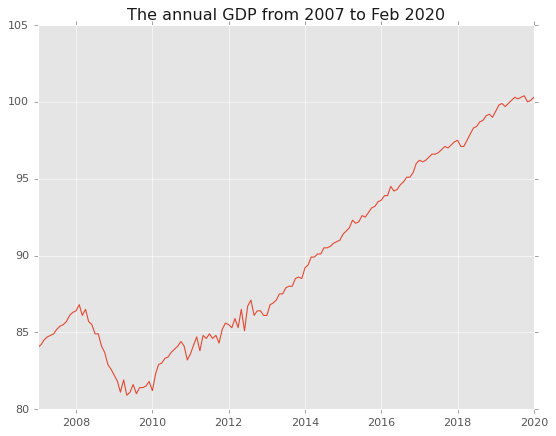

In [97]:
from pandas import DataFrame
y= monthly_gdp_uk["Monthly GDP"][:157]
x= monthly_gdp_uk["Date"][:157]
# plt.figure()
# plt.title('The annual GDP')
# plt.plot(y, x)
# plt.show()
# # Plot-1, the annual gross domestic product.
plt.figure()
plt.title('The annual GDP from 2007 to Feb 2020')
plt.plot(x, y)
plt.show()

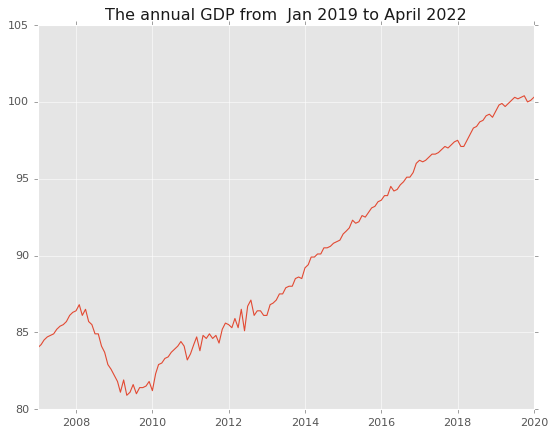

In [98]:
y1= monthly_gdp_uk["Monthly GDP"][144:]
x1= monthly_gdp_uk["Date"][144:]
plt.figure()
plt.title('The annual GDP from  Jan 2019 to April 2022')
plt.plot(x, y)
plt.show()

In [99]:
import plotly.express as px
figure = px.scatter(data_frame = monthly_gdp_uk, x=x1,
                    y=y1, 
                    title = "The annual GDP from  Jan 2019| to April 2022")
figure.show()

In [100]:
import plotly.express as px
figure = px.scatter(data_frame = monthly_gdp_uk, x="Date",
                    y="Monthly GDP", trendline="ols", 
                    title = "The annual GDP")
figure.show()

In [101]:
condition = monthly_gdp_uk[(monthly_gdp_uk["Date"] < "2018-01-01")]
print(min(condition["Monthly GDP"]))

condition = monthly_gdp_uk[(monthly_gdp_uk["Date"] > "2018-01-01")]
print(min(condition["Monthly GDP"]))

condition = monthly_gdp_uk[(monthly_gdp_uk["Monthly GDP"] ==  80.9)]
condition
# The minimum value before the pandemic was 80.9 on "2009-05-01".
# It is clear that the pandemic adversely affected the economy.

80.9
75.0


,Date,Monthly GDP
28,2009-05-01,80.9


In [102]:
monthly_gdp_uk[monthly_gdp_uk["Monthly GDP"] == min(monthly_gdp_uk["Monthly GDP"])]["Date"]
# The day that it had the minimum value.

159   2020-04-01
Name: Date, dtype: datetime64[ns]

In [103]:
monthly_gdp_uk[monthly_gdp_uk["Monthly GDP"] == min(monthly_gdp_uk["Monthly GDP"])]
# If it is needed as a dataframe.

,Date,Monthly GDP
159,2020-04-01,75.0


<AxesSubplot: title={'center': 'Monthly Rate'}, xlabel='year', ylabel='rate'>

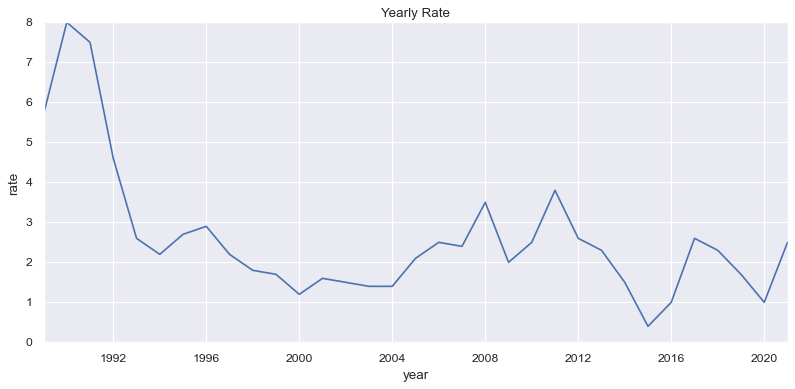

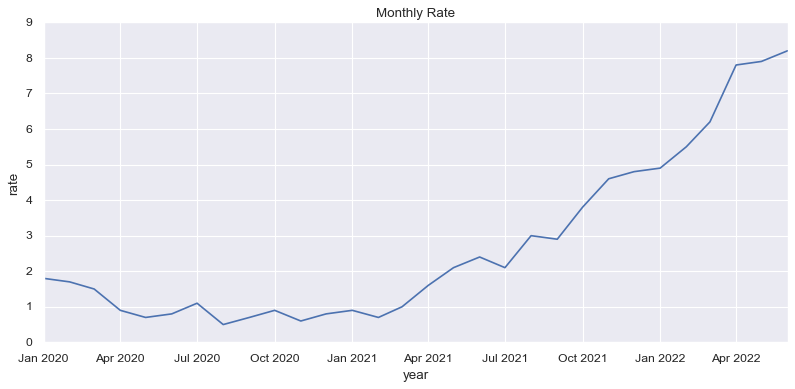

In [104]:
#Some Exploratory Data Analysis 
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,5))
plt.title("Yearly Rate")
sns.lineplot(x="year", y="rate", data=annual_inflation_rate_yearly)


sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,5))
plt.title("Monthly Rate")
sns.lineplot(x="year", y="rate", data=annual_inflation_rate_monthly)

In [105]:
figure = px.line(annual_inflation_rate_yearly, 'year', 'rate',
                    title = "Yearly Rate")
figure.show()

In [106]:
# reading covid-19 England data.
# renaming the columns.
# changing the data type.
# printing the data types.

covid_data = pd.read_csv("England_Cases_by_Specimen.csv")
covid_data = covid_data[["areaName","date","newCasesBySpecimenDate","cumCasesBySpecimenDate"]]
covid_data.rename(columns = {'areaName':'Country_Name', 'date':'Date', 'newCasesBySpecimenDate':'New_Cases', 'cumCasesBySpecimenDate':'Cumulative_Cases'}, inplace = True)
covid_data['Date'] =  pd.to_datetime(covid_data['Date'])
print(covid_data.dtypes)
covid_data.head()

Country_Name                object
Date                datetime64[ns]
New_Cases                    int64
Cumulative_Cases             int64
dtype: object


,Country_Name,Date,New_Cases,Cumulative_Cases
0,England,2022-06-30,13504,19144946
1,England,2022-06-29,20401,19131442
2,England,2022-06-28,21309,19111041
3,England,2022-06-27,21629,19089732
4,England,2022-06-26,17941,19068103


In [107]:
print("the first day:", covid_data.iloc[882][1], "\nthe last day:", covid_data.iloc[0][1])
 
# the last case a new case shown up is 30-June-2022
# the first case a new case shown up is 30-January-2020

the first day: 2020-01-30 00:00:00 
the last day: 2022-06-30 00:00:00


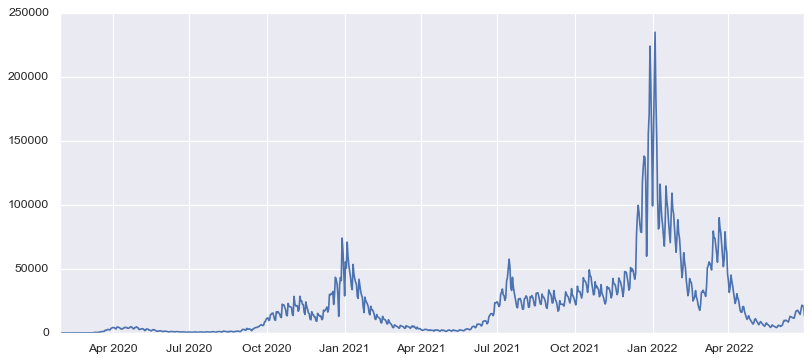

In [108]:
# the number of new cases by time.
plt.figure(figsize=(12,5))
plt.plot(covid_data["Date"], covid_data["New_Cases"])

In [109]:
figure = px.line(covid_data, covid_data["Date"], covid_data["New_Cases"],
                    title = "UK COVID 19 CASES")
figure.show()

In [110]:
print("Maximum new case number per a day is:", max(covid_data["New_Cases"]))

Maximum new case number per a day is: 234860


# The following part of this project was run by the data collected by WHO.

In [111]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [112]:
# creating separated data frames.
# joining the tables by using "Date_reported".

df_uk = df[df["Country_code"] == "GB"]
df_fr = df[df["Country_code"] == "FR"]

df_join = df_uk.join(df_fr.set_index("Date_reported"), lsuffix='UK', rsuffix='FR', on ="Date_reported")
df_join[["New_casesUK",	"Cumulative_casesUK","New_deathsUK","Cumulative_deathsUK","New_casesFR","Cumulative_casesFR","New_deathsFR","Cumulative_deathsFR"]]

# back-up data frames.
df_clean = df_join.drop(columns=["Date_reported","Country_codeUK","CountryUK" , "WHO_regionUK","Country_codeFR","CountryFR","WHO_regionFR"])
df_clean_with_date = df_join.drop(columns=["Country_codeUK","CountryUK" , "WHO_regionUK","Country_codeFR","CountryFR","WHO_regionFR"])
df_clean_with_date["Date_reported"] = pd.to_datetime(df_clean_with_date["Date_reported"])

# to see the first day that the number of case was 1.
# df_clean_with_date[df_clean_with_date["New_casesUK"] == 1]


In [113]:
print("The correlation table between New_casesUK and other columns:")
df_clean_with_date.corr().iloc[0]

The correlation table between New_casesUK and other columns:


New_casesUK            1.000000
Cumulative_casesUK     0.432656
New_deathsUK           0.134456
Cumulative_deathsUK    0.450331
New_casesFR            0.666076
Cumulative_casesFR     0.289363
New_deathsFR           0.076461
Cumulative_deathsFR    0.461253
Name: New_casesUK, dtype: float64

In [114]:
# Financial Times Stock Exchange 100 data.
# Cotation Assistée en Continu 40 data. 
# changing the data types.

ftse_daily = pd.read_csv("HistoricalPricesFTSE100.csv")
ftse_daily["Date"] = pd.to_datetime(ftse_daily["Date"])

cac_daily = pd.read_csv("HistoricalPricesCAC40.csv")
cac_daily["Date"] = pd.to_datetime(cac_daily["Date"])


In [115]:
# creating a table including stock comparison.
# creating a new column calculating the daily changes.

Stock_value_join = ftse_daily.join(cac_daily.set_index("Date"), lsuffix='UK', rsuffix='FR', on ="Date")
Stock_value_join["Daily_Change_UK"] = ( np.array(Stock_value_join[" CloseUK"]) - np.array(Stock_value_join[" OpenUK"]) ) / np.array(Stock_value_join[" CloseUK"])
Stock_value_join["Daily_Change_FR"] = ( np.array(Stock_value_join[" CloseFR"]) - np.array(Stock_value_join[" OpenFR"]) ) / np.array(Stock_value_join[" CloseFR"])
Stock_value_join

,Date,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
0,2022-07-22,7270.51,7315.34,7254.02,7276.37,6174.29,6247.35,6168.77,6216.82,0.000805,0.006841
1,2022-07-21,7264.31,7274.73,7200.14,7270.51,6160.37,6233.98,6143.06,6201.11,0.000853,0.006570
2,2022-07-20,7296.28,7347.60,7253.56,7264.31,6229.79,6245.47,6151.36,6184.66,-0.004401,-0.007297
3,2022-07-19,7223.24,7308.99,7174.40,7296.28,6031.60,6213.88,6028.79,6201.22,0.010011,0.027353
4,2022-07-18,7159.01,7268.88,7159.01,7223.24,6070.21,6136.02,6059.87,6091.91,0.008892,0.003562
...,...,...,...,...,...,...,...,...,...,...,...
906,2019-01-07,6837.42,6874.11,6778.01,6810.88,4757.01,4760.27,4690.22,4719.17,-0.003897,-0.008018
907,2019-01-04,6692.66,6850.37,6692.50,6837.42,4649.63,4750.51,4636.79,4737.12,0.021172,0.018469
908,2019-01-03,6734.23,6753.14,6685.09,6692.66,4641.80,4671.28,4607.68,4611.49,-0.006211,-0.006573
909,2019-01-02,6728.13,6753.29,6599.48,6734.23,4642.18,4699.98,4606.20,4689.39,0.000906,0.010067


In [116]:
#Removing the whitespaces in the column names.

Stock_value_join.columns = Stock_value_join.columns.str.replace(' ','')
Stock_value_join.columns

Index(['Date', 'OpenUK', 'HighUK', 'LowUK', 'CloseUK', 'OpenFR', 'HighFR',
       'LowFR', 'CloseFR', 'Daily_Change_UK', 'Daily_Change_FR'],
      dtype='object')

In [239]:
# joining the stock table with the cleaned covid data. 
# checking the correlations.
main_table = df_clean_with_date.join(Stock_value_join.set_index("Date"), on ="Date_reported")
main_table.corr()

,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
New_casesUK,1.000000,0.432656,0.134456,0.450331,0.666076,0.289363,0.076461,0.461253,0.410314,0.414011,0.414351,0.418012,0.547664,0.552557,0.543678,0.548433,0.047680,0.028740
Cumulative_casesUK,0.432656,1.000000,-0.112914,0.850608,0.536452,0.979417,-0.123883,0.856190,0.672135,0.683236,0.664316,0.674472,0.619535,0.630336,0.608118,0.617889,0.013618,0.002799
New_deathsUK,0.134456,-0.112914,1.000000,-0.108978,0.037040,-0.123948,0.634132,-0.121757,-0.257407,-0.258465,-0.249315,-0.249674,-0.234129,-0.236015,-0.232107,-0.233128,0.058072,0.009446
Cumulative_deathsUK,0.450331,0.850608,-0.108978,1.000000,0.424231,0.789910,-0.088628,0.995764,0.679322,0.681781,0.685026,0.686665,0.782725,0.788520,0.779709,0.784046,0.048767,0.050615
New_casesFR,0.666076,0.536452,0.037040,0.424231,1.000000,0.466903,0.061595,0.421924,0.361939,0.368257,0.358036,0.364323,0.385906,0.390815,0.377532,0.383621,0.014559,-0.009543
Cumulative_casesFR,0.289363,0.979417,-0.123948,0.789910,0.466903,1.000000,-0.122240,0.797178,0.608218,0.620020,0.598817,0.609644,0.507378,0.518146,0.495994,0.505673,0.008073,-0.001024
New_deathsFR,0.076461,-0.123883,0.634132,-0.088628,0.061595,-0.122240,1.000000,-0.099970,-0.241567,-0.240438,-0.230633,-0.228930,-0.164628,-0.165103,-0.161174,-0.160714,0.088374,0.046565
Cumulative_deathsFR,0.461253,0.856190,-0.121757,0.995764,0.421924,0.797178,-0.099970,1.000000,0.693567,0.696519,0.698752,0.700830,0.797303,0.803278,0.793589,0.798289,0.048147,0.046283
OpenUK,0.410314,0.672135,-0.257407,0.679322,0.361939,0.608218,-0.241567,0.693567,1.000000,0.995953,0.993606,0.989882,0.909622,0.908669,0.905893,0.904890,-0.069795,-0.026629
HighUK,0.414011,0.683236,-0.258465,0.681781,0.368257,0.620020,-0.240438,0.696519,0.995953,1.000000,0.994341,0.995207,0.908084,0.909335,0.904834,0.905600,-0.004951,0.003924


In [118]:
# checking the spesific new_cases column with other desired ones in for loop.
for e in ["OpenUK","HighUK","LowUK","CloseUK","Daily_Change_UK"]:
    print("the corr between new_cases in the UK and {} is: {}".format(e,main_table[e].corr(main_table.New_casesUK )))

the corr between new_cases in the UK and OpenUK is: 0.4103140745026591
the corr between new_cases in the UK and HighUK is: 0.41401068549061826
the corr between new_cases in the UK and LowUK is: 0.4143513915252269
the corr between new_cases in the UK and CloseUK is: 0.4180122871488967
the corr between new_cases in the UK and Daily_Change_UK is: 0.04768044148921111


In [119]:
# normalization to aviod seeing a variable dominates the others because of its large values.
import pandas as pd
from sklearn import preprocessing

x = df_clean.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015725,0.000000
...,...,...,...,...,...,...,...,...
927,0.052560,0.998236,0.076867,0.999064,0.147170,0.990048,0.055528,0.996252
928,0.059964,0.998948,0.081259,0.999672,0.035426,0.990596,0.101229,0.997429
929,0.054929,0.999600,0.043924,1.000000,0.267537,0.994731,0.086486,0.998404
930,0.033684,1.000000,0.000000,1.000000,0.179272,0.997503,0.068796,0.999134


In [120]:
# normalization by manual. 
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result



In [121]:
# the size of the data might not be enough to see the full benefits of the normalization.
print(normalize(df_clean).corr())
print(df_clean.corr())


                     New_casesUK  Cumulative_casesUK  New_deathsUK  \
New_casesUK             1.000000            0.432656      0.134456   
Cumulative_casesUK      0.432656            1.000000     -0.112914   
New_deathsUK            0.134456           -0.112914      1.000000   
Cumulative_deathsUK     0.450331            0.850608     -0.108978   
New_casesFR             0.666076            0.536452      0.037040   
Cumulative_casesFR      0.289363            0.979417     -0.123948   
New_deathsFR            0.076461           -0.123883      0.634132   
Cumulative_deathsFR     0.461253            0.856190     -0.121757   

                     Cumulative_deathsUK  New_casesFR  Cumulative_casesFR  \
New_casesUK                     0.450331     0.666076            0.289363   
Cumulative_casesUK              0.850608     0.536452            0.979417   
New_deathsUK                   -0.108978     0.037040           -0.123948   
Cumulative_deathsUK             1.000000     0.424231        

In [122]:
# checking the number of null values.
print("the first, unfilled version:")
print(main_table.isna().sum())

# filling them with the former values.
# controlling the number of null values in the filled table.
main_table_filled = main_table.fillna(method='ffill')
print("the number of null values of the filled table:", main_table_filled.isna().sum().sum())

the first, unfilled version:
Date_reported            0
New_casesUK              0
Cumulative_casesUK       0
New_deathsUK             0
Cumulative_deathsUK      0
New_casesFR              0
Cumulative_casesFR       0
New_deathsFR             0
Cumulative_deathsFR      0
OpenUK                 281
HighUK                 281
LowUK                  281
CloseUK                281
OpenFR                 286
HighFR                 286
LowFR                  286
CloseFR                286
Daily_Change_UK        281
Daily_Change_FR        286
dtype: int64
the number of null values of the filled table: 0


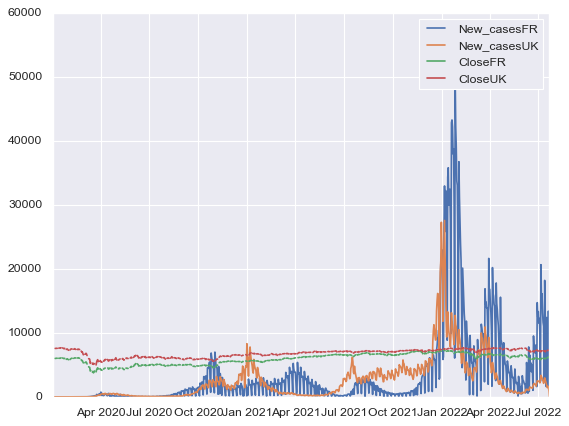

In [123]:
# the relation closing prices and new cases in different countries.

plt.plot(main_table["Date_reported"], main_table["New_casesFR"]/10, label ='New_casesFR' )
plt.plot(main_table["Date_reported"], main_table["New_casesUK"]/10, label ='New_casesUK' )
plt.plot(main_table["Date_reported"], main_table["CloseFR"], label ='CloseFR' )
plt.plot(main_table["Date_reported"], main_table["CloseUK"], label ='CloseUK' )
plt.legend()

# in this case, new_cases columns are divided by 10 to fit the size.

In [124]:
main_table["CloseUK"].corr(main_table["CloseFR"])
# we can say they have similar reaction during the pandemic.

0.914692267905556

In [125]:
main_table.corr()

,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
New_casesUK,1.000000,0.432656,0.134456,0.450331,0.666076,0.289363,0.076461,0.461253,0.410314,0.414011,0.414351,0.418012,0.547664,0.552557,0.543678,0.548433,0.047680,0.028740
Cumulative_casesUK,0.432656,1.000000,-0.112914,0.850608,0.536452,0.979417,-0.123883,0.856190,0.672135,0.683236,0.664316,0.674472,0.619535,0.630336,0.608118,0.617889,0.013618,0.002799
New_deathsUK,0.134456,-0.112914,1.000000,-0.108978,0.037040,-0.123948,0.634132,-0.121757,-0.257407,-0.258465,-0.249315,-0.249674,-0.234129,-0.236015,-0.232107,-0.233128,0.058072,0.009446
Cumulative_deathsUK,0.450331,0.850608,-0.108978,1.000000,0.424231,0.789910,-0.088628,0.995764,0.679322,0.681781,0.685026,0.686665,0.782725,0.788520,0.779709,0.784046,0.048767,0.050615
New_casesFR,0.666076,0.536452,0.037040,0.424231,1.000000,0.466903,0.061595,0.421924,0.361939,0.368257,0.358036,0.364323,0.385906,0.390815,0.377532,0.383621,0.014559,-0.009543
Cumulative_casesFR,0.289363,0.979417,-0.123948,0.789910,0.466903,1.000000,-0.122240,0.797178,0.608218,0.620020,0.598817,0.609644,0.507378,0.518146,0.495994,0.505673,0.008073,-0.001024
New_deathsFR,0.076461,-0.123883,0.634132,-0.088628,0.061595,-0.122240,1.000000,-0.099970,-0.241567,-0.240438,-0.230633,-0.228930,-0.164628,-0.165103,-0.161174,-0.160714,0.088374,0.046565
Cumulative_deathsFR,0.461253,0.856190,-0.121757,0.995764,0.421924,0.797178,-0.099970,1.000000,0.693567,0.696519,0.698752,0.700830,0.797303,0.803278,0.793589,0.798289,0.048147,0.046283
OpenUK,0.410314,0.672135,-0.257407,0.679322,0.361939,0.608218,-0.241567,0.693567,1.000000,0.995953,0.993606,0.989882,0.909622,0.908669,0.905893,0.904890,-0.069795,-0.026629
HighUK,0.414011,0.683236,-0.258465,0.681781,0.368257,0.620020,-0.240438,0.696519,0.995953,1.000000,0.994341,0.995207,0.908084,0.909335,0.904834,0.905600,-0.004951,0.003924


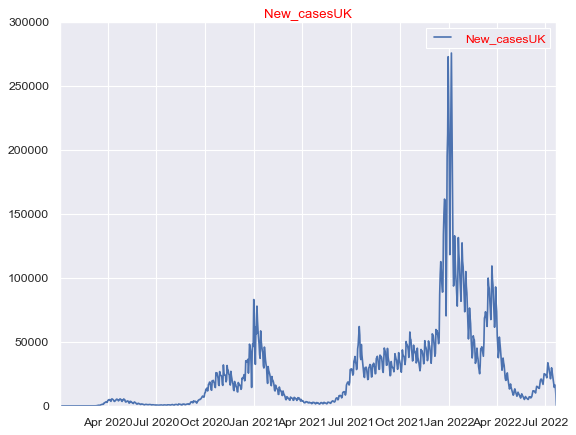

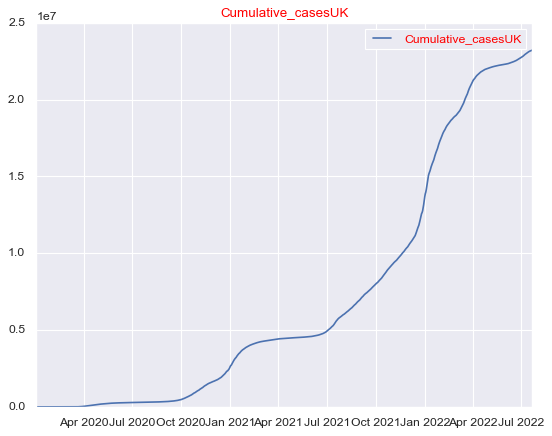

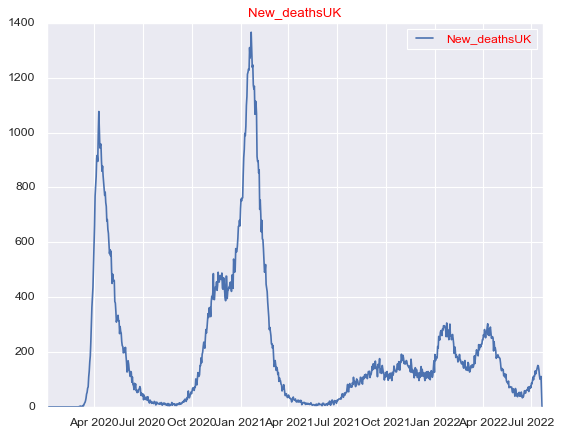

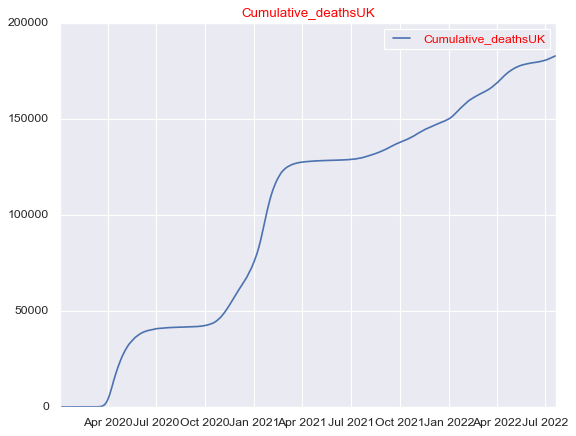

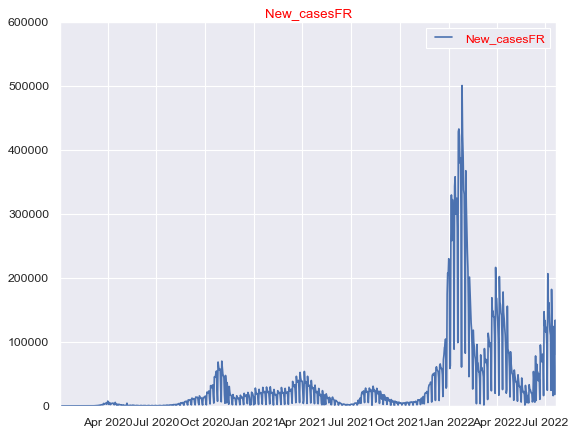

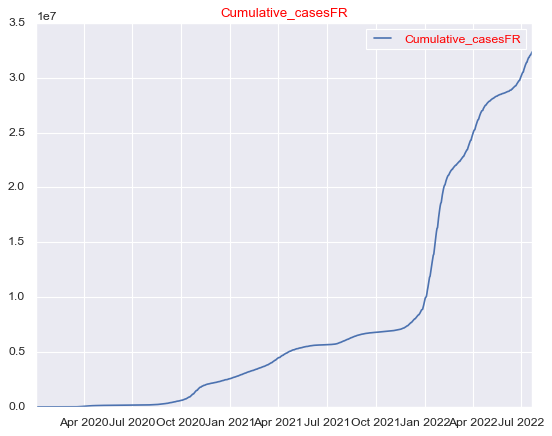

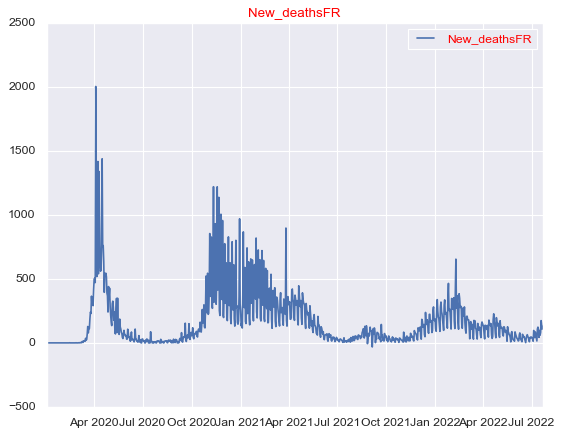

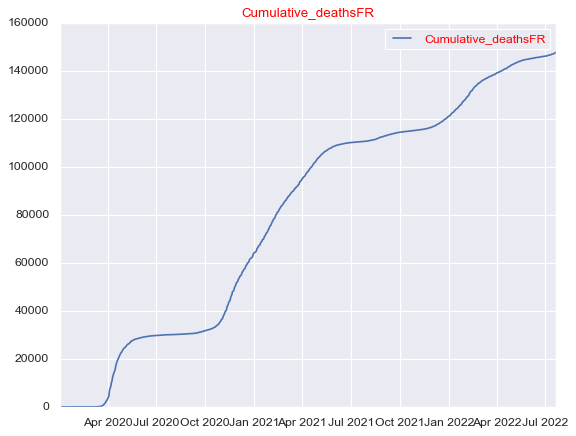

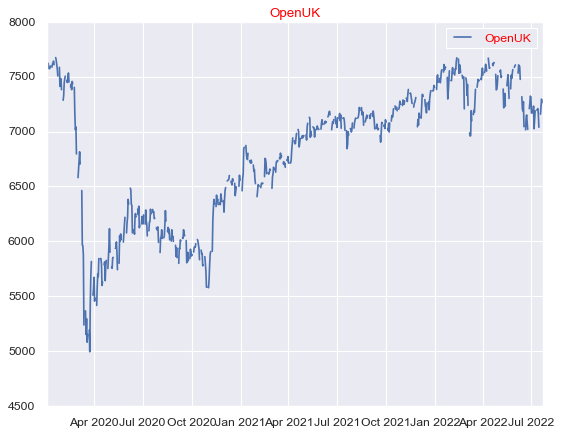

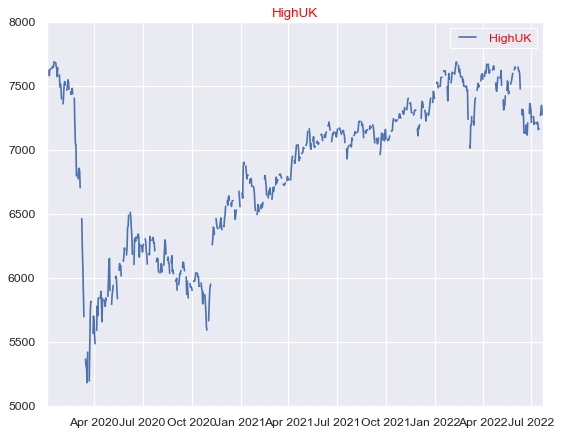

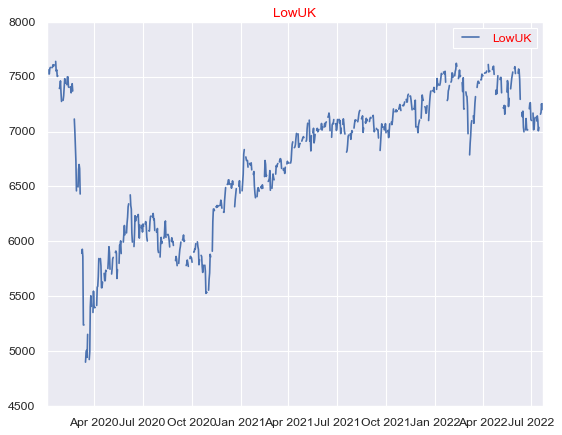

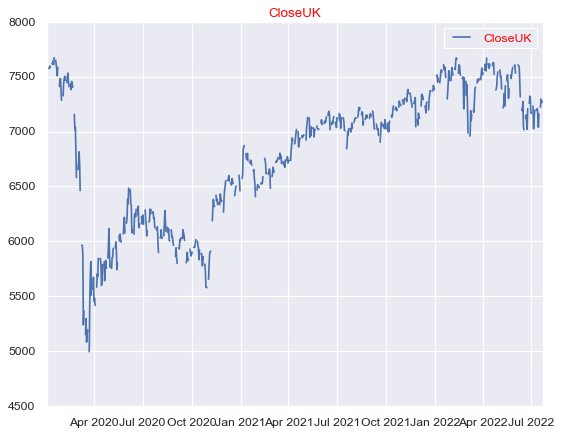

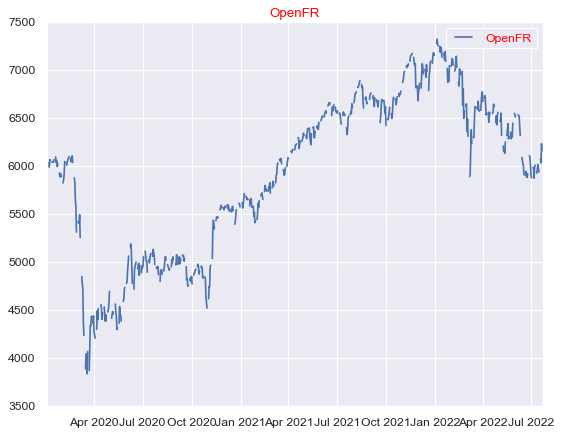

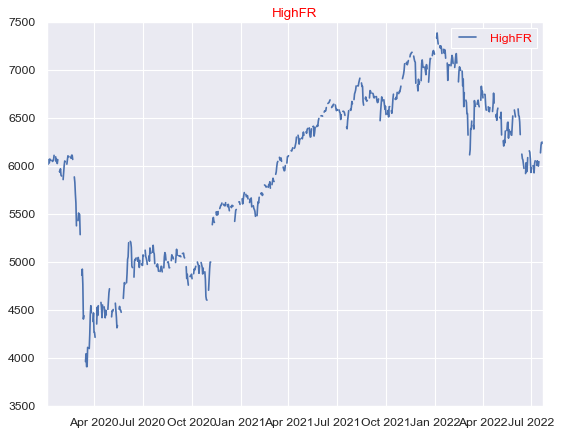

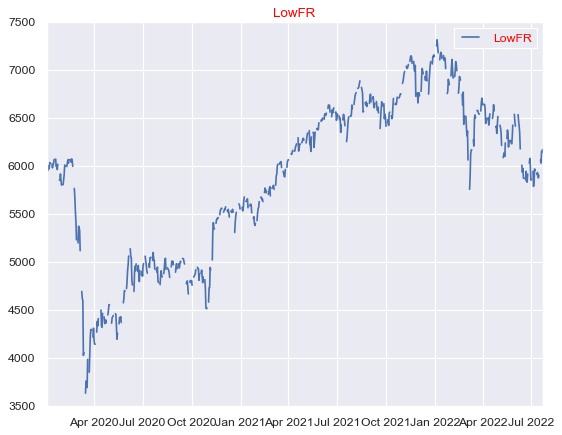

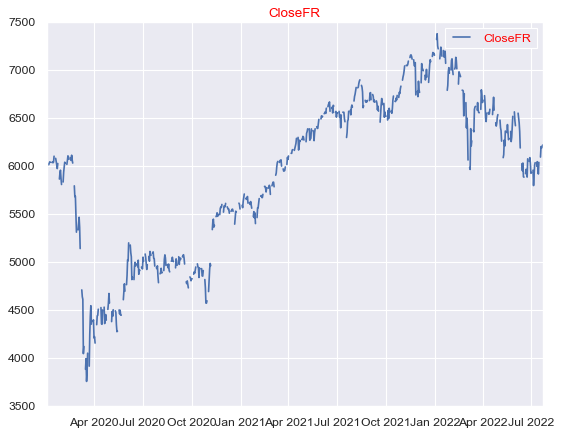

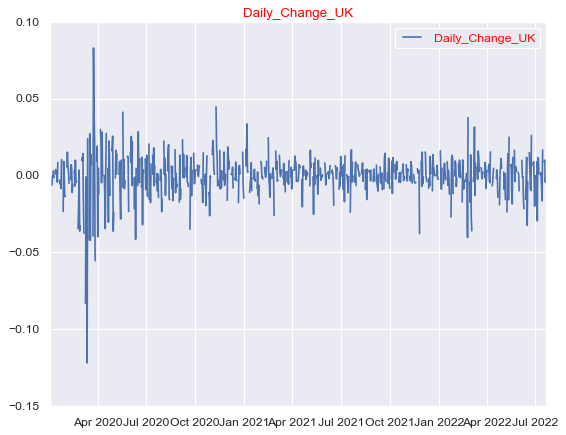

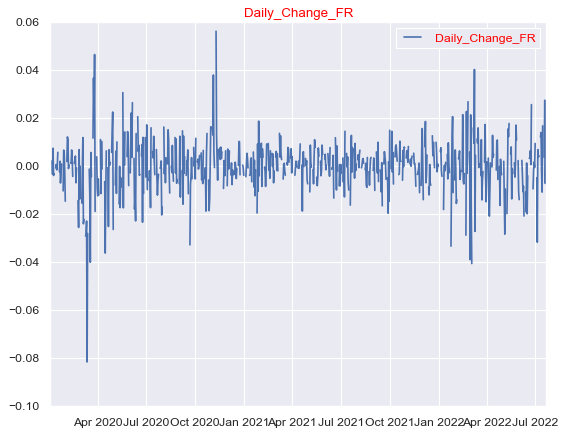

In [126]:
# the trends of the features by time (except date_reported column itself).

for e in main_table.columns:
    if e == "Date_reported":
         continue
    plt.rcParams.update({'text.color': "red"})
    plt.plot(main_table["Date_reported"], main_table[e], label = e)
    plt.title(e)
    plt.legend()
    plt.show()

In [127]:
# the stock market is closed at the weekends which means there would be no value for these days. At this point, 

# copying the data frame to have a back up.
main_table_comparison = main_table.copy()

# removing the null values at the weekends. 
main_table_comparison.dropna(inplace=True)

# the weight dictionary, if it is needed to read it from this. 
manuel_weights = {"New_cases":1, "Cumulative_cases":0.5, "New_deaths":2, "Cumulativedeaths":1, "Daily_Change_UK":-1}
manuel_weights

{'New_cases': 1,
 'Cumulative_cases': 0.5,
 'New_deaths': 2,
 'Cumulativedeaths': 1,
 'Daily_Change_UK': -1}

In [128]:
#main_table_comparison.drop(columns="Date_reported", inplace=True)
main_table_comparison =  normalize(main_table_comparison)
main_table_comparison.head()

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795


In [129]:
# Changing all the columns of the dataframe to  numpy arrays.					
array_New_casesUK                     =    np.array(main_table_comparison["New_casesUK"])
array_Cumulative_casesUK              =    np.array(main_table_comparison["Cumulative_casesUK"])
array_New_deathsUK                    =    np.array(main_table_comparison["New_deathsUK"])
array_Cumulative_deathsUK             =    np.array(main_table_comparison["Cumulative_deathsUK"])
array_New_casesFR                     =    np.array(main_table_comparison["New_casesFR"])
array_Cumulative_casesFR              =    np.array(main_table_comparison["Cumulative_casesFR"])
array_New_deathsFR                    =    np.array(main_table_comparison["New_deathsFR"])
array_Cumulative_deathsFR             =    np.array(main_table_comparison["Cumulative_deathsFR"])
array_OpenUK                          =    np.array(main_table_comparison["OpenUK"])
array_HighUK                          =    np.array(main_table_comparison["HighUK"])
array_LowUK                           =    np.array(main_table_comparison["LowUK"])
array_CloseUK                         =    np.array(main_table_comparison["CloseUK"])
array_OpenFR                          =    np.array(main_table_comparison["OpenFR"])
array_newHighFR_FR                    =    np.array(main_table_comparison["HighFR"])
array_LowFR                           =    np.array(main_table_comparison["LowFR"])
array_CloseFR                         =    np.array(main_table_comparison["CloseFR"])
array_Daily_Change_UK                 =    np.array(main_table_comparison["Daily_Change_UK"])
array_Daily_Change_FR                 =    np.array(main_table_comparison["Daily_Change_FR"])


# Using the default comparison value is 0.
new_comparison = np.zeros(array_New_casesUK.shape[0], dtype=int)

counter = 0
for nc_UK, cc_UK, nd_UK, cd_UK, nc_FR, cc_FR, nd_FR, cd_FR, close_UK, close_FR, change_UK, change_FR, idx in zip( 
array_New_casesUK        
,array_Cumulative_casesUK 
,array_New_deathsUK       
,array_Cumulative_deathsUK
,array_New_casesFR        
,array_Cumulative_casesFR 
,array_New_deathsFR       
,array_Cumulative_deathsFR             
,array_CloseUK                        
,array_CloseFR            
,array_Daily_Change_UK
,array_Daily_Change_FR       
,main_table_comparison.reset_index().index): 
    if nc_UK*1 + cc_UK*0.5 + nd_UK*2 + cd_UK*1 + change_UK*(-1) < nc_FR*1 + cc_FR*0.5 + nd_FR*2 + cd_FR*1 + change_FR*(-1):
        counter +=1
        new_comparison[idx] = 1
print(counter) 

# Data frame columns are converted to numpy arrays.
# It calculates the performance changes it if it is 1. 

main_table_comparison['comparison'] = new_comparison.tolist()
# The comparison list is added to the main table to see the results.

224


In [130]:
0.0	*1 +0*0.5 +0*2 + 0*1 + 0.594134*(-1) < 0*1 + 0*0.5 + 0*2 +0*1 + 0.567668*(-1)

True

In [131]:
main_table_comparison.head(10)

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320,0
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797,0
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668,1
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028,0
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795,1
196659,0.007519,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.971485,0.976995,0.980097,0.967654,0.637532,0.618246,0.650889,0.630195,0.588492,0.569262,1
196662,0.010741,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.967654,0.978514,0.979163,0.978752,0.632992,0.618494,0.648184,0.629927,0.614141,0.587123,1
196663,0.011815,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.978752,0.984462,0.981462,0.980524,0.632000,0.614877,0.637786,0.631239,0.598133,0.596990,1
196664,0.012889,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980524,0.981316,0.988989,0.988152,0.633511,0.616860,0.646269,0.628952,0.608144,0.580696,1
196665,0.013963,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.988152,0.985614,0.983833,0.975846,0.632622,0.618574,0.648917,0.630725,0.573949,0.592149,0


In [240]:
main_table_comparison.shape

(646, 20)

In [132]:
main_table_comparison[main_table_comparison.comparison == 1].shape[0] / main_table_comparison.shape[0]

# to see the percentages to understand who has more 1 values.
# the UK has a little bit more successful which makes it a little bit more successful in this case.

0.34674922600619196

In [133]:
# removing non-numerical datetime column. 
## main_table_comparison.drop(columns="Date_reported", inplace=True)
main_table_comparison.head()

,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
196652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.973790,0.974783,0.967667,0.980542,0.623541,0.614314,0.641736,0.632142,0.606675,0.636320,0
196655,0.003222,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.980542,0.973185,0.959304,0.962987,0.621605,0.606779,0.631050,0.623700,0.564794,0.607797,0
196656,0.004296,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962987,0.966085,0.971731,0.962431,0.630786,0.620522,0.643205,0.623358,0.594134,0.567668,1
196657,0.005371,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962431,0.956076,0.958166,0.962834,0.617475,0.610528,0.635809,0.628508,0.595789,0.646028,0
196658,0.006445,0.0,0.0,0.0,0.0,0.0,0.0,0.004155,0.0,0.962834,0.975321,0.976398,0.971485,0.640403,0.622225,0.652481,0.631697,0.609979,0.563795,1


In [134]:
# train - test split
# dropping the column to be predicted.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_table_comparison.drop('comparison',axis=1), main_table_comparison['comparison'], test_size=0.30, random_state=42)

In [135]:
# fitting the train set.
# predicting the y values.

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [138]:
# checking the accuracy.

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, predictions)
tn, fp, fn, tp  = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp 

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       115
           1       1.00      0.35      0.52        79

    accuracy                           0.74       194
   macro avg       0.85      0.68      0.67       194
weighted avg       0.82      0.74      0.70       194



(115, 0, 51, 28)

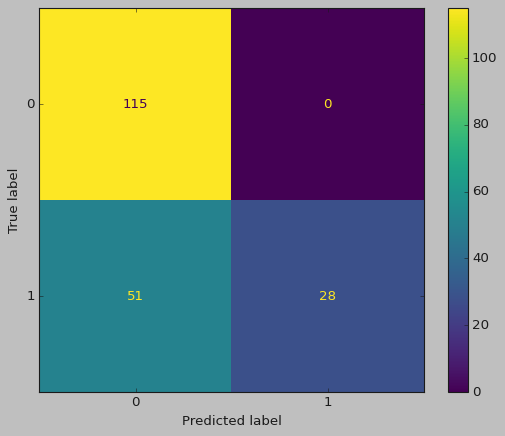

In [139]:
style.use('classic')
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logmodel.classes_)
disp.plot()

In [140]:
# Fitting the train set.
# Predicting the y values.
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
svcmodel = LinearSVC()
svcmodel.fit(X_train,y_train)
svcpredictions = svcmodel.predict(X_test)
print(classification_report(y_test,svcpredictions))
confusion_matrix(y_test, predictions)
tn, fp, fn, tp  = confusion_matrix(y_test, svcpredictions).ravel()
tn, fp, fn, tp 

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       115
           1       0.98      0.66      0.79        79

    accuracy                           0.86       194
   macro avg       0.89      0.82      0.84       194
weighted avg       0.88      0.86      0.85       194



(114, 1, 27, 52)

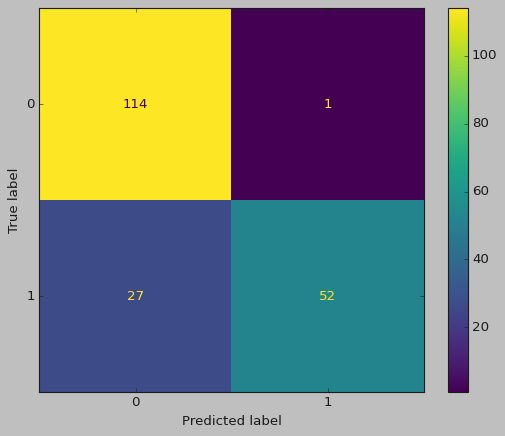

In [141]:
style.use('classic')
cm = confusion_matrix(y_test, svcpredictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svcmodel.classes_)
disp.plot()

In [142]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
dtpredictions = dtmodel.predict(X_test)
print(classification_report(y_test, dtpredictions))
confusion_matrix(y_test, dtpredictions)
tn, fp, fn, tp  = confusion_matrix(y_test, dtpredictions).ravel()
tn, fp, fn, tp 

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       115
           1       0.70      0.76      0.73        79

    accuracy                           0.77       194
   macro avg       0.76      0.77      0.76       194
weighted avg       0.77      0.77      0.77       194



(89, 26, 19, 60)

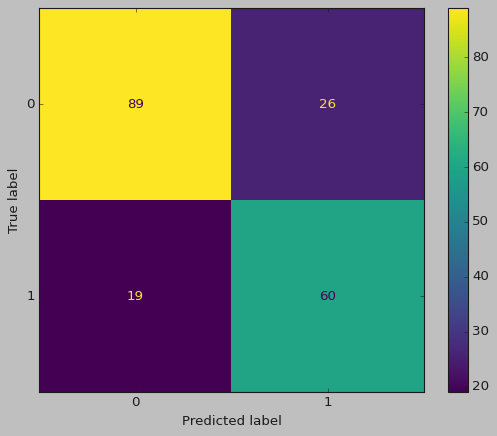

In [143]:
style.use('classic')
cm = confusion_matrix(y_test, dtpredictions, labels=dtmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtmodel.classes_)
disp.plot()

In [144]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
rfpredictions = rfmodel.predict(X_test)
print(classification_report(y_test, rfpredictions))
confusion_matrix(y_test, rfpredictions)
tn, fp, fn, tp  = confusion_matrix(y_test, rfpredictions).ravel()
tn, fp, fn, tp 

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       115
           1       0.86      0.78      0.82        79

    accuracy                           0.86       194
   macro avg       0.86      0.85      0.85       194
weighted avg       0.86      0.86      0.86       194



(105, 10, 17, 62)

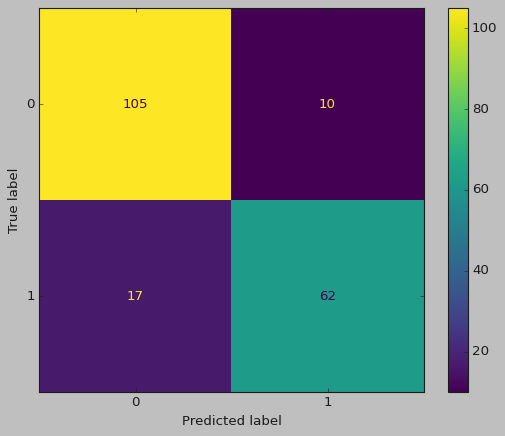

In [145]:
style.use('classic')
cm = confusion_matrix(y_test, rfpredictions, labels=rfmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rfmodel.classes_)
disp.plot()

In [146]:
# Calculating Metrics 

def perf_measure(y_test, predictions):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if y_test[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==1 and y_test[i]!=predictions[i]:
            FP += 1
        if predictions[i]==0 and y_test[i]!=predictions[i]:
            FN += 1
        if y_test[i]==predictions[i]==1:
            TP += 1

    return(TN, FP, FN, TP)
    
perf_measure(np.array(y_test), predictions)

(115, 0, 51, 28)

In [147]:
# printing the tn, fp, fn, tp metrics.

print(
tn, "   of them were negative and predicted correctly\n ", 
fp, "   of them were positive and predicted as negative wrongly\n",
fn, "   of them were negative and predicted as positive wrongly\n",
tp, "   of them were positive and predicted correctly")

105    of them were negative and predicted correctly
  10    of them were positive and predicted as negative wrongly
 17    of them were negative and predicted as positive wrongly
 62    of them were positive and predicted correctly


In [148]:
# 
array_New_casesUK                     =    np.array(X_test["New_casesUK"])
array_Cumulative_casesUK              =    np.array(X_test["Cumulative_casesUK"])
array_New_deathsUK                    =    np.array(X_test["New_deathsUK"])
array_Cumulative_deathsUK             =    np.array(X_test["Cumulative_deathsUK"])
array_New_casesFR                     =    np.array(X_test["New_casesFR"])
array_Cumulative_casesFR              =    np.array(X_test["Cumulative_casesFR"])
array_New_deathsFR                    =    np.array(X_test["New_deathsFR"])
array_Cumulative_deathsFR             =    np.array(X_test["Cumulative_deathsFR"])
array_OpenUK                          =    np.array(X_test["OpenUK"])
array_HighUK                          =    np.array(X_test["HighUK"])
array_LowUK                           =    np.array(X_test["LowUK"])
array_CloseUK                         =    np.array(X_test["CloseUK"])
array_OpenFR                          =    np.array(X_test["OpenFR"])
array_newHighFR_FR                    =    np.array(X_test["HighFR"])
array_LowFR                           =    np.array(X_test["LowFR"])
array_CloseFR                         =    np.array(X_test["CloseFR"])
array_Daily_Change_UK                 =    np.array(X_test["Daily_Change_UK"])
array_Daily_Change_FR                 =    np.array(X_test["Daily_Change_FR"])


new_comparison = np.zeros(array_New_casesUK.shape[0], dtype=int)

counter = 0
for nc_UK, cc_UK, nd_UK, cd_UK, nc_FR, cc_FR, nd_FR, cd_FR, close_UK, close_FR, change_UK, change_FR, idx in zip( 
array_New_casesUK        
,array_Cumulative_casesUK 
,array_New_deathsUK       
,array_Cumulative_deathsUK
,array_New_casesFR        
,array_Cumulative_casesFR 
,array_New_deathsFR       
,array_Cumulative_deathsFR             
,array_CloseUK                        
,array_CloseFR            
,array_Daily_Change_UK
,array_Daily_Change_FR       
,main_table_comparison.reset_index().index): 
    if nc_UK*1 + cc_UK*0.5 + nd_UK*2 + cd_UK*1 + change_UK*(-1) < nc_FR*1 + cc_FR*0.5 + nd_FR*2 + cd_FR*1 + change_FR*(-1):
        counter +=1
        new_comparison[idx] = 1
print(counter) 

# adding the "comparison" column to the X_test data frame.
X_test['comparison'] = new_comparison.tolist()
X_test

#

79


,Date_reported,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR,OpenUK,HighUK,LowUK,CloseUK,OpenFR,HighFR,LowFR,CloseFR,Daily_Change_UK,Daily_Change_FR,comparison
197567,0.982814,0.122166,0.985686,0.082723,0.990707,0.412643,0.948839,0.056094,0.990482,0.757863,0.804296,0.775882,0.788564,0.584622,0.580753,0.601401,0.595754,0.651567,0.642087,1
197184,0.571429,0.040094,0.202605,0.009517,0.704001,0.005544,0.174292,0.042244,0.742195,0.805597,0.786720,0.769822,0.754878,0.809766,0.799326,0.795351,0.777108,0.500598,0.495571,1
197142,0.526316,0.009320,0.194485,0.009517,0.701845,0.007767,0.163943,0.155817,0.711003,0.776776,0.782268,0.794424,0.796749,0.732809,0.713815,0.736203,0.726397,0.631719,0.588982,1
197075,0.454350,0.017954,0.183298,0.168375,0.680573,0.040778,0.111667,0.083102,0.581498,0.555660,0.570710,0.578161,0.594866,0.555544,0.545326,0.579589,0.562732,0.672896,0.620292,0
196756,0.111708,0.015727,0.004364,0.628843,0.094447,0.005236,0.003247,1.000000,0.115988,0.225227,0.189980,0.247732,0.236709,0.163026,0.146694,0.186567,0.164384,0.621766,0.505748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197091,0.471536,0.024295,0.187278,0.069546,0.693127,0.060682,0.122636,0.275623,0.613097,0.675100,0.647640,0.676813,0.659828,0.635114,0.619549,0.653323,0.635085,0.565567,0.600660,1
197103,0.484425,0.013535,0.190049,0.028551,0.697122,0.087010,0.134469,0.094875,0.635955,0.651591,0.628925,0.659154,0.649942,0.619824,0.610122,0.639228,0.624231,0.591893,0.617599,1
196852,0.214823,0.001625,0.012778,0.010249,0.225604,0.002106,0.005239,0.009695,0.203308,0.472878,0.452295,0.494416,0.475941,0.371660,0.363697,0.398037,0.372616,0.601480,0.556605,1
197523,0.935553,0.018201,0.958705,0.051977,0.976145,0.033892,0.879705,0.009695,0.977933,0.893840,0.929751,0.908918,0.939896,0.721898,0.704811,0.714905,0.719006,0.675237,0.601828,0


In [161]:
df_clean

,New_casesUK,Cumulative_casesUK,New_deathsUK,Cumulative_deathsUK,New_casesFR,Cumulative_casesFR,New_deathsFR,Cumulative_deathsFR
196652,0,0,0,0,0,0,0,0
196653,0,0,0,0,0,0,0,0
196654,0,0,0,0,0,0,0,0
196655,0,0,0,0,0,0,0,0
196656,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
197579,14488,23172062,105,182556,73668,32058696,81,147271
197580,16529,23188591,111,182667,17733,32076429,174,147445
197581,15141,23203732,60,182727,133919,32210348,144,147589
197582,9285,23213017,0,182727,89737,32300085,108,147697


In [206]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as MAPE, mean_squared_error as MSE

from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
seed = 0

In [207]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 5)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] + [None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
              }
print(random_grid)

{'n_estimators': [100, 550, 1000, 1450, 1900], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}


In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('New_casesUK',axis=1), df_clean['New_casesUK'], test_size=0.30, random_state=42)

In [209]:
rf = RandomForestRegressor(criterion='squared_error', random_state = seed)       # base model to tune
# Random search of parameters, using 5 fold rolling basis cross validation, 
# search across 80 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = TimeSeriesSplit(n_splits= 5, test_size= 14),
                               verbose=1, random_state=seed, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=14),
                   estimator=RandomForestRegressor(random_state=0), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'n_estimators': [100, 550, 1000, 1450,
                                                         1900]},
                   random_state=0, verbose=1)

In [210]:
rf_random.best_params_

{'n_estimators': 1000, 'max_depth': 70}

In [211]:
pd.DataFrame(rf_random.cv_results_).iloc[:, 6:].sort_values(by = "rank_test_score").head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,"{'n_estimators': 1000, 'max_depth': 60}",0.977213,0.945327,0.955338,0.971211,0.953191,0.960456,0.011869,1
23,"{'n_estimators': 1000, 'max_depth': None}",0.977213,0.945327,0.955338,0.971211,0.953191,0.960456,0.011869,1
16,"{'n_estimators': 1000, 'max_depth': 80}",0.977213,0.945327,0.955338,0.971211,0.953191,0.960456,0.011869,1
35,"{'n_estimators': 1000, 'max_depth': 40}",0.977213,0.945327,0.955338,0.971211,0.953191,0.960456,0.011869,1
6,"{'n_estimators': 1000, 'max_depth': 70}",0.977213,0.945327,0.955338,0.971211,0.953191,0.960456,0.011869,1


In [212]:
best_random = rf_random.best_estimator_
random_err = MSE(best_random.predict(X_test), y_test)

print(f"model_err: {random_err:.2f}")

model_err: 58514528.20


In [213]:
rf_random.best_score_

0.9604559977852558

In [232]:
RF_err = (abs(rf_random.best_score_), random_err, RMSE)
RF_err

(0.9604559977852558, 58514528.20227057, 7649.478949723998)

In [215]:
RMSE = random_err**.5
RMSE

7649.478949723998

In [216]:
# predict the random search model
rfpred = best_random.predict(X_test)
rfpred

array([3.88408540e+04, 3.23461000e+02, 3.06824590e+04, 2.28224100e+03,
       4.12479020e+04, 4.32000000e+03, 2.24768200e+03, 3.00117800e+03,
       8.72510600e+03, 3.07063400e+04, 1.12505525e+05, 5.69623400e+03,
       9.27731000e+02, 4.97826400e+03, 1.30247900e+03, 4.92711300e+03,
       1.17843400e+03, 4.95819400e+03, 1.34112350e+04, 1.44644050e+04,
       4.04037760e+04, 1.72585920e+04, 3.78541080e+04, 1.22000000e-01,
       9.22754000e+03, 2.53868990e+04, 7.17777100e+03, 3.72977720e+04,
       2.40630100e+04, 5.98016900e+03, 5.11878190e+04, 1.60331000e+02,
       2.13600000e+00, 3.19319540e+04, 4.01036690e+04, 3.88773120e+04,
       5.06451330e+04, 5.00118000e+03, 5.62487180e+04, 4.60069700e+03,
       5.63400000e+01, 1.75968050e+04, 1.68527330e+04, 3.12502350e+04,
       3.71356000e+03, 7.58798540e+04, 1.81130500e+04, 4.66127870e+04,
       1.07461914e+05, 2.45025630e+04, 4.05497070e+04, 2.37747340e+04,
       2.72922700e+03, 4.48280030e+04, 0.00000000e+00, 1.33771900e+03,
      

In [217]:
y_test

197481    27877
196722      428
197283    35851
197158     2365
197355    38782
          ...  
197239    31517
197080     5937
196954    23649
197063    14735
196938    19135
Name: New_casesUK, Length: 280, dtype: int64

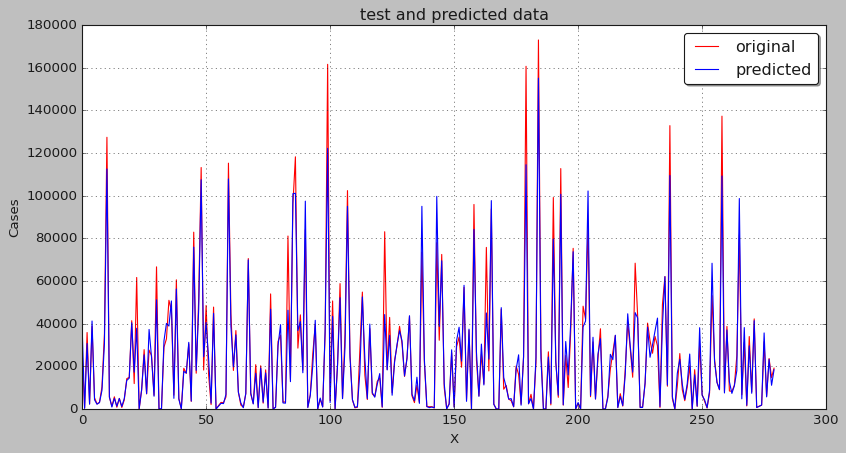

In [246]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original", color = 'red')
plt.plot(x_ax, rfpred, label="predicted", color = 'blue')
plt.title("test and predicted data")
plt.xlabel('X')
plt.ylabel('Cases')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

<AxesSubplot: >

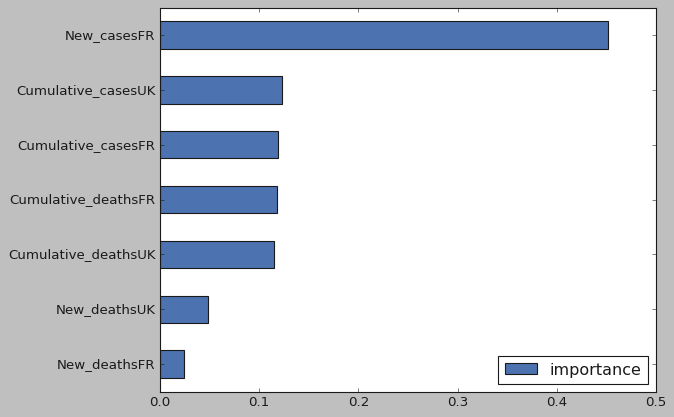

In [218]:
pd.DataFrame(rf_random.best_estimator_.feature_importances_, index = df_clean.drop('New_casesUK',axis=1).columns).sort_values(by = 0, ascending=1)\
            .rename(columns = {0:"importance"}).plot(kind= "barh")

In [219]:
lgbm = LGBMRegressor(random_state=seed)
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [220]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] + [None]
learning_rate = [0.01, 0.1]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate
              }
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'learning_rate': [0.01, 0.1]}


In [221]:
lgbm_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_grid,
                                 n_iter = 80, cv = TimeSeriesSplit(n_splits= 5, test_size= 14),
                                 verbose=1, random_state=seed, n_jobs = -1,
                                 scoring = "neg_mean_squared_error")
# Fit the random search model
lgbm_random.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=14),
                   estimator=LGBMRegressor(random_state=0), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [222]:
lgbm_random.best_params_

{'n_estimators': 1000, 'max_depth': None, 'learning_rate': 0.1}

In [223]:
pd.DataFrame(lgbm_random.cv_results_).iloc[:, 5:].sort_values(by = "rank_test_score").head()

,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,70,0.1,"{'n_estimators': 1000, 'max_depth': 70, 'learn...",-1.793005e+07,-2.043477e+07,-4.729862e+07,-2.135208e+07,-1.937397e+07,-2.527790e+07,1.106912e+07,1
35,50,0.1,"{'n_estimators': 1000, 'max_depth': 50, 'learn...",-1.793005e+07,-2.043477e+07,-4.729862e+07,-2.135208e+07,-1.937397e+07,-2.527790e+07,1.106912e+07,1
38,90,0.1,"{'n_estimators': 1000, 'max_depth': 90, 'learn...",-1.793005e+07,-2.043477e+07,-4.729862e+07,-2.135208e+07,-1.937397e+07,-2.527790e+07,1.106912e+07,1
8,None,0.1,"{'n_estimators': 1000, 'max_depth': None, 'lea...",-1.793005e+07,-2.043477e+07,-4.729862e+07,-2.135208e+07,-1.937397e+07,-2.527790e+07,1.106912e+07,1
10,40,0.1,"{'n_estimators': 1000, 'max_depth': 40, 'learn...",-1.793005e+07,-2.043477e+07,-4.729862e+07,-2.135208e+07,-1.937397e+07,-2.527790e+07,1.106912e+07,1


In [224]:
best_lgbm = lgbm_random.best_estimator_
lgbm_err = MSE(best_lgbm.predict(X_test), y_test)

print(f"model_err: {lgbm_err:.2f}")

model_err: 42806688.63


In [225]:
lgbm_random.best_score_

-25277895.937789995

In [226]:
RMSE_l = lgbm_err**.5
RMSE_l

6542.682067380184

In [231]:
LGBM_err = (abs(lgbm_random.best_score_), lgbm_err, RMSE_l)
LGBM_err

(25277895.937789995, 42806688.63481824, 6542.682067380184)

In [229]:
# predict the LGBM
lgbmpred = best_lgbm.predict(X_test)
lgbmpred

array([ 2.69923310e+04,  6.69385852e+02,  2.91826004e+04,  2.30019457e+03,
        3.77386233e+04,  4.34368577e+03,  2.60344702e+03,  2.59072359e+03,
        1.00802102e+04,  3.46305088e+04,  1.08265340e+05,  8.28249523e+03,
        1.40644329e+03,  1.02702424e+04,  1.00798989e+03,  5.57835684e+03,
        6.23970721e+02,  6.24055213e+03,  9.52226505e+03,  1.46206399e+04,
        4.37134408e+04,  1.69757705e+04,  3.75236427e+04, -1.10138298e+00,
        8.16954193e+03,  2.35166974e+04,  6.88054732e+03,  3.95376733e+04,
        2.19896579e+04,  5.62280524e+03,  5.09109538e+04,  5.09542054e+02,
        4.18113249e+00,  3.36356249e+04,  3.98704392e+04,  4.27755340e+04,
        5.12525293e+04,  5.26610347e+03,  4.18251403e+04,  3.42466378e+03,
       -4.06022801e+01,  1.95716412e+04,  1.74370974e+04,  3.27863709e+04,
        4.45090110e+03,  8.61451937e+04,  1.52431323e+04,  4.03403008e+04,
        1.09636186e+05,  2.10850686e+04,  4.51573028e+04,  2.76378910e+04,
        1.76349940e+03,  

In [230]:
y_test

197481    27877
196722      428
197283    35851
197158     2365
197355    38782
          ...  
197239    31517
197080     5937
196954    23649
197063    14735
196938    19135
Name: New_casesUK, Length: 280, dtype: int64

<AxesSubplot: >

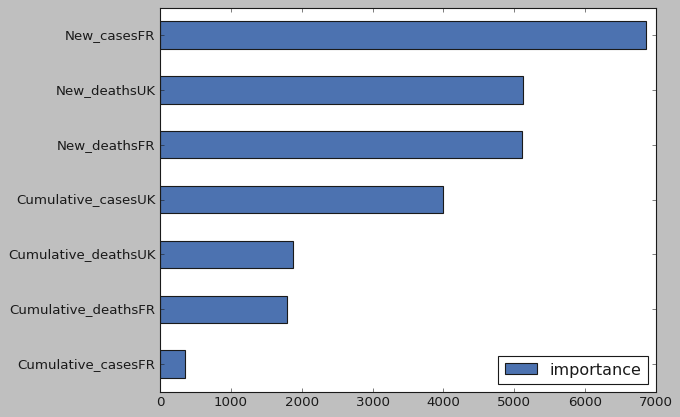

In [196]:
pd.DataFrame(lgbm_random.best_estimator_.feature_importances_, index = df_clean.drop('New_casesUK',axis=1).columns).sort_values(by = 0, ascending=1)\
            .rename(columns = {0:"importance"}).plot(kind= "barh")

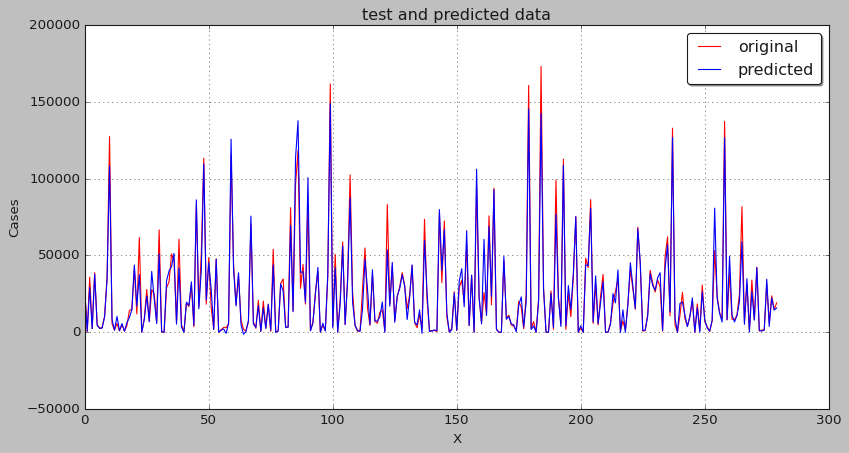

In [245]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original", color = 'red')
plt.plot(x_ax, lgbmpred, label="predicted", color = 'blue')
plt.title("test and predicted data")
plt.xlabel('X')
plt.ylabel('Cases')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  


In [233]:
[LGBM_err, RF_err]

[(25277895.937789995, 42806688.63481824, 6542.682067380184),
 (0.9604559977852558, 58514528.20227057, 7649.478949723998)]

In [48]:
# End of the jupyter file.
# thank you.